In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../resultados_experimentacion/resultados.csv")
df = df[["algoritmo", "S", "T", "result", "used_memory", "t_mean"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   algoritmo    36 non-null     object 
 1   S            36 non-null     object 
 2   T            36 non-null     object 
 3   result       36 non-null     int64  
 4   used_memory  36 non-null     int64  
 5   t_mean       36 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


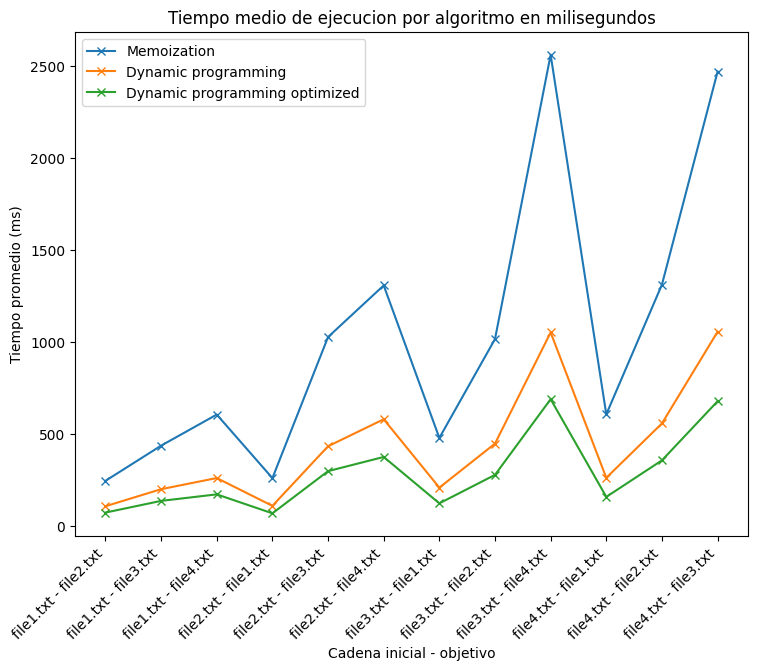

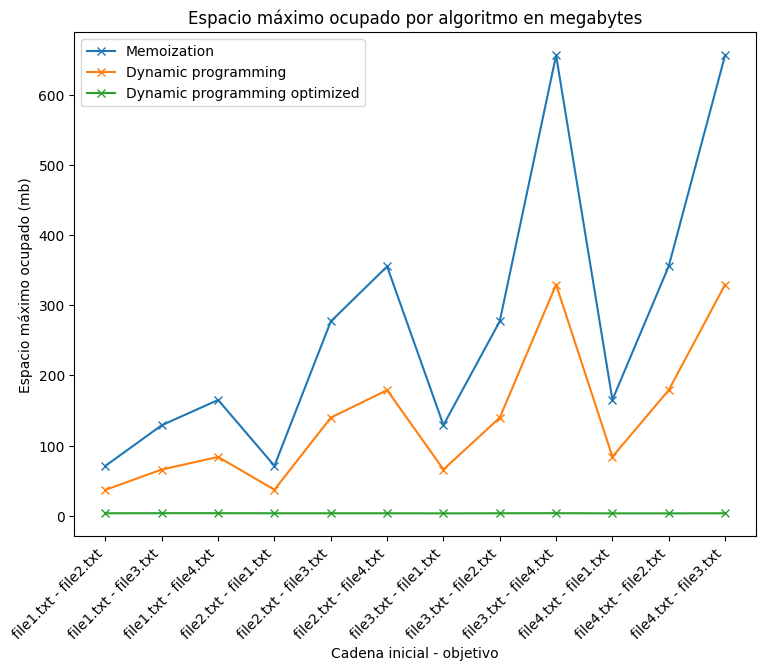

In [42]:
df_memo = df[df["algoritmo"] == "memo"]
x_files_memo = df_memo["S"].str[7:] + " - " + df_memo["T"].str[7:]
y_time_memo = df_memo["t_mean"]/pow(10,6)
y_memory_memo = df_memo["used_memory"]/1000

df_DP = df[df["algoritmo"] == "DP"]
x_files_DP = df_DP["S"].str[7:] + " - " + df_DP["T"].str[7:]
y_time_DP = df_DP["t_mean"]/pow(10,6)
y_memory_DP = df_DP["used_memory"]/1000

df_DPO = df[df["algoritmo"] == "DPO"]
x_files_DPO = df_DPO["S"].str[7:] + " - " + df_DPO["T"].str[7:]
y_time_DPO = df_DPO["t_mean"]/pow(10,6)
y_memory_DPO = df_DPO["used_memory"]/1000

plt.figure(figsize=(8,6))
plt.plot(x_files_memo, y_time_memo, marker="x", label="Memoization")
plt.plot(x_files_DP, y_time_DP, marker="x", label="Dynamic programming")
plt.plot(x_files_DPO, y_time_DPO, marker="x", label="Dynamic programming optimized")
plt.xlabel("Cadena inicial - objetivo")
plt.ylabel("Tiempo promedio (ms)")
plt.title("Tiempo medio de ejecucion por algoritmo en milisegundos")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45, ha="right")

plt.savefig("../resultados_experimentacion/grafico_tiempo", bbox_inches="tight")

plt.figure(figsize=(8,6))
plt.plot(x_files_memo, y_memory_memo, marker="x", label="Memoization")
plt.plot(x_files_DP, y_memory_DP, marker="x", label="Dynamic programming")
plt.plot(x_files_DPO, y_memory_DPO, marker="x", label="Dynamic programming optimized")
plt.xlabel("Cadena inicial - objetivo")
plt.ylabel("Espacio máximo ocupado (mb)")
plt.title("Espacio máximo ocupado por algoritmo en megabytes")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45, ha="right")

plt.savefig("../resultados_experimentacion/grafico_espacio", bbox_inches="tight")

plt.show()